# 1. Supervised Learning - classification (Part 1)

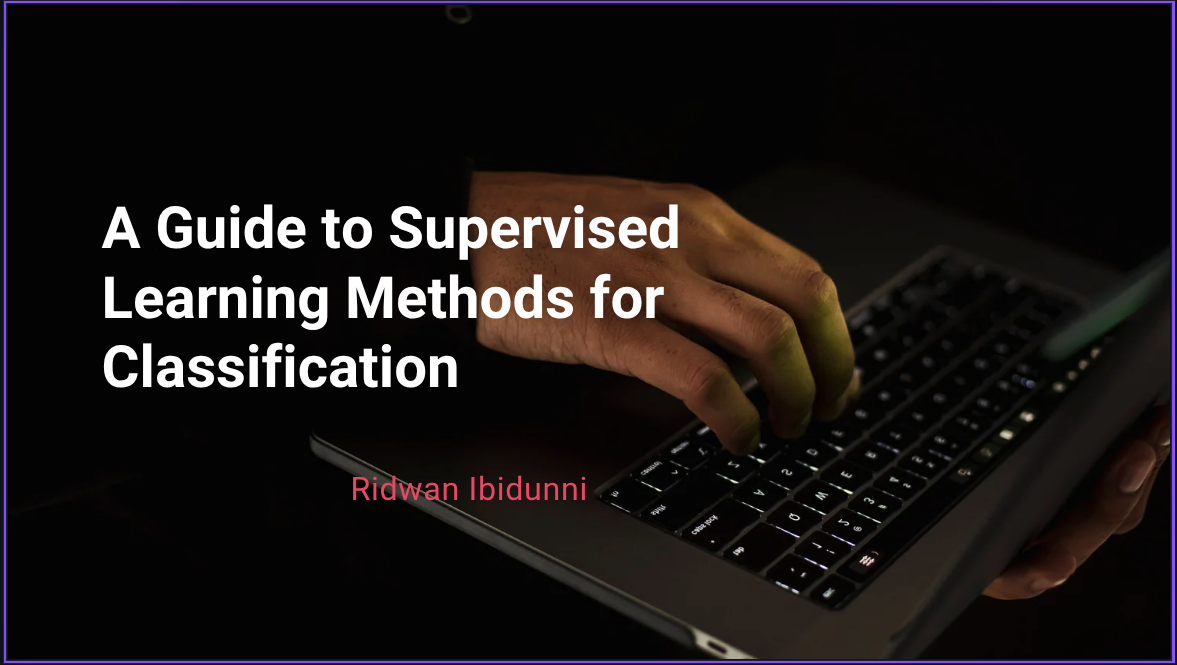

## **Definition Refresher:** In regression, we predicted continuous values. In classification, we will predict discrete categories or classes.

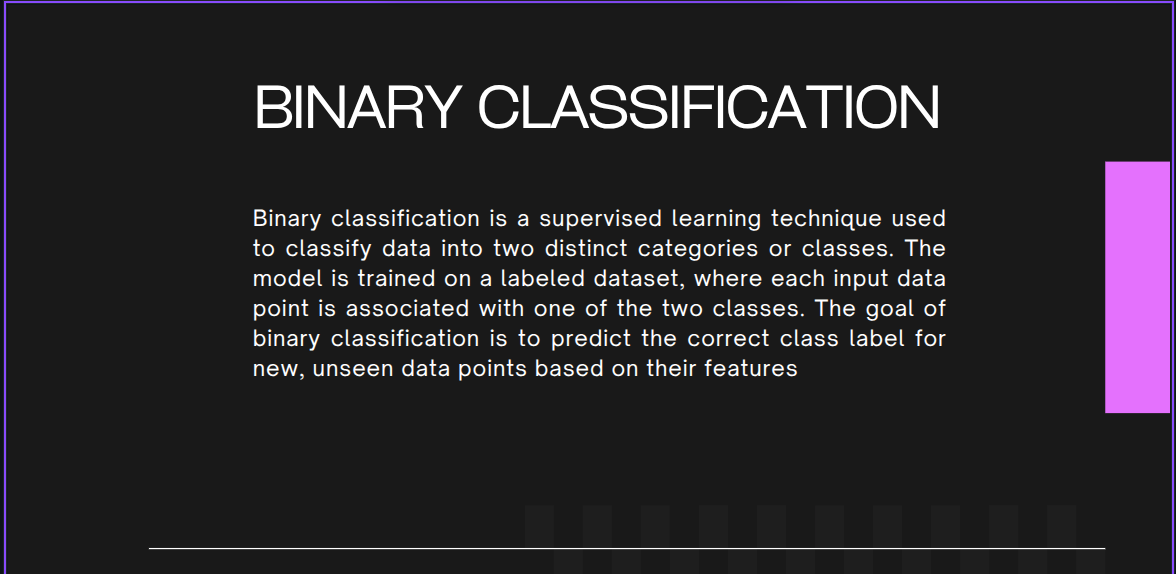

## **Today's Focus:** Binary and Multi-class Classification using Logistic Regression and Support Vector Machines - the foundation algorithms that power many real-world applications.

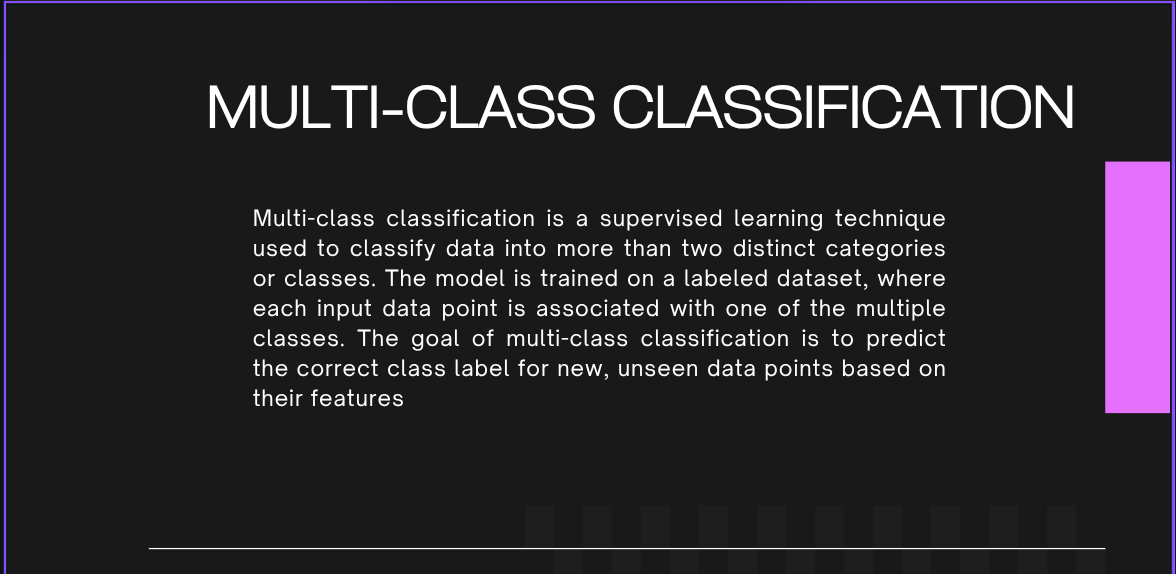

## Beyond Simple Prediction: The Classification Reality

Real-world classification problems require different approaches based on:

- **Number of classes: Binary (2 classes) vs. Multi-class (3+ classes)**

- **Data separability: Linearly separable vs. Non-linearly separable**

- **Class balance: Balanced vs. Imbalanced datasets**

- **Feature relationships: Independent vs. Correlated features**

### The Classification Method Spectrum

Simple → Complex
Logistic Regression → SVM (Linear) → SVM (RBF) → Ensemble Methods


## Key Questions to Frame Any Classification Problem:

- How many classes are we predicting?
- Are the classes linearly separable?
- Do we have balanced or imbalanced classes?
- What's the cost of false positives vs. false negatives?
- Do we need probability estimates or just predictions?

# Problem Statement: Predicting Customer Churn in Telecommunications

### **Scenario:**  A telecommunications company is losing customers at an alarming rate. They need to identify customers likely to churn (cancel their service) so they can proactively offer retention incentives.

### **The Challenge:** Customer churn depends on complex patterns in usage behavior, service quality, and customer demographics. Traditional rule-based approaches miss subtle patterns and interactions.





**Why Classification?** This is a binary classification problem:
- Class 0: Customer stays (No Churn)
- Class 1: Customer leaves (Churn)


**Why These Algorithms?**

- Logistic Regression: Provides probability estimates for retention campaigns
- Support Vector Machines: Handles complex customer behavior patterns
- Real-world Impact: Reducing churn by 5% can increase profits by 25-95%

# Data Acquisition and Initial Inspection

**Dataset:** Telco Customer Churn Dataset (IBM Watson Analytics)
[Source:](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load Telco Customer Churn Dataset

url = "https://raw.githubusercontent.com/plotly/datasets/master/telco-customer-churn-by-IBM.csv"
churn_df = pd.read_csv(url)

churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
churn_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# Quick overview
print(f"Dataset shape: {churn_df.shape}")
print("\nTelco Customer Churn Dataset:")
print("Predicting customer churn for proactive retention strategies")
print("\nFeature statistics:")
churn_df.describe().T

Dataset shape: (7043, 21)

Telco Customer Churn Dataset:
Predicting customer churn for proactive retention strategies

Feature statistics:


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [ ]:
# Check data types and missing values
print(f"\nData types:\n{churn_df.dtypes}")
print(f"\nMissing values: {churn_df.isnull().sum().sum()}")


Data types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Missing values: 0


In [ ]:
churn_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
churn_df.tenure.unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

#  Exploratory Data Analysis: Understanding Churn Patterns

In [ ]:
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen']
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>]], dtype=object)

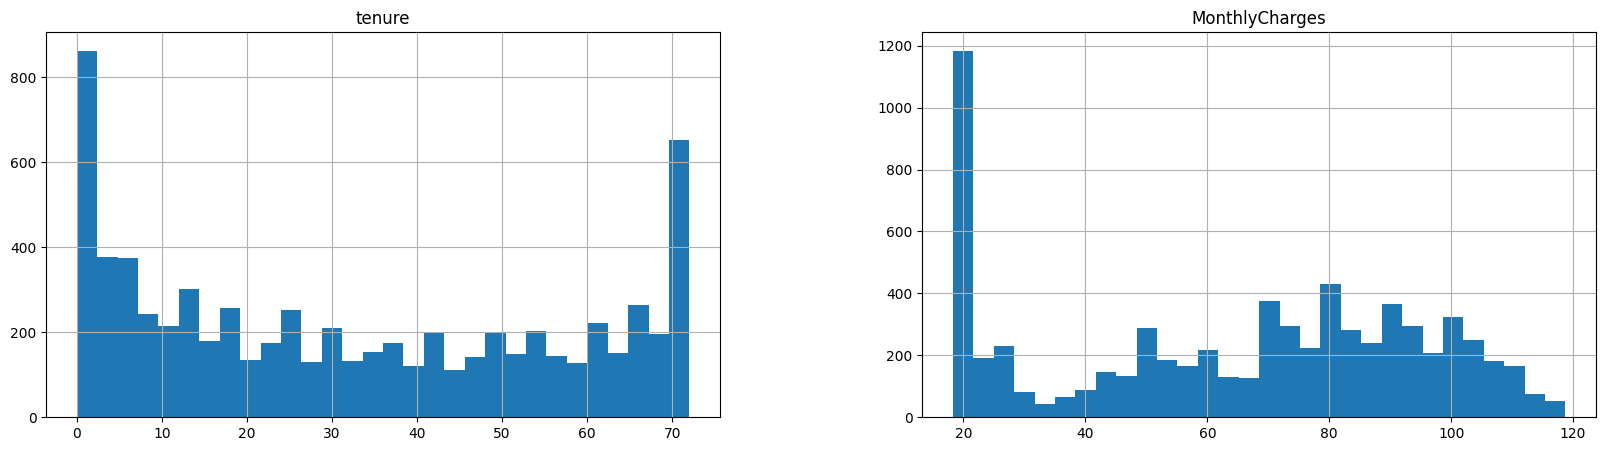

In [ ]:
churn_df[numerical_features].hist(bins= 30, figsize=(20, 5))


In [ ]:
#convert TotalCharges to numerical values
churn_df['TotalCharges'] = pd.to_numeric(churn_df['TotalCharges'], errors='coerce')

In [ ]:
#check TotalCharges datatype
churn_df.TotalCharges.dtype

dtype('float64')

array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

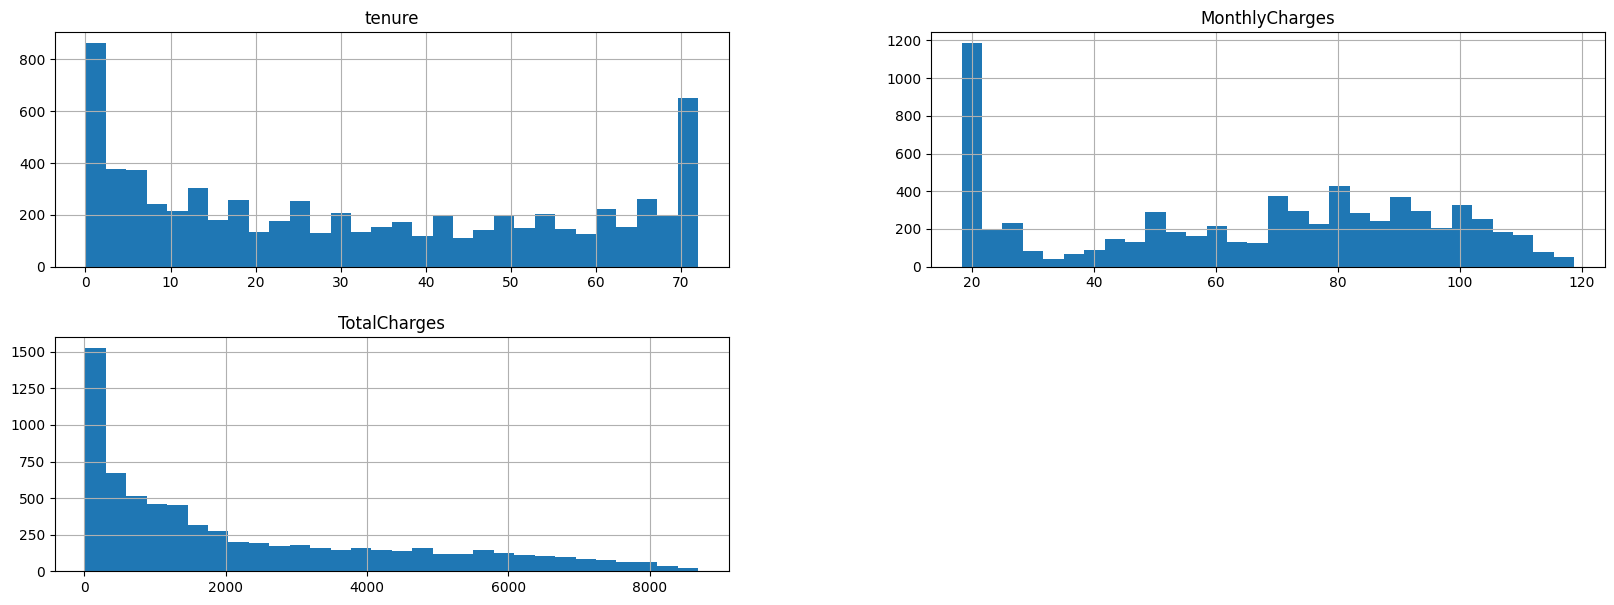

In [ ]:
#new view distribution with histogram again
churn_df[numerical_features].hist(bins= 30, figsize=(20, 7))

In [ ]:
categorical_features = ['gender', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen']


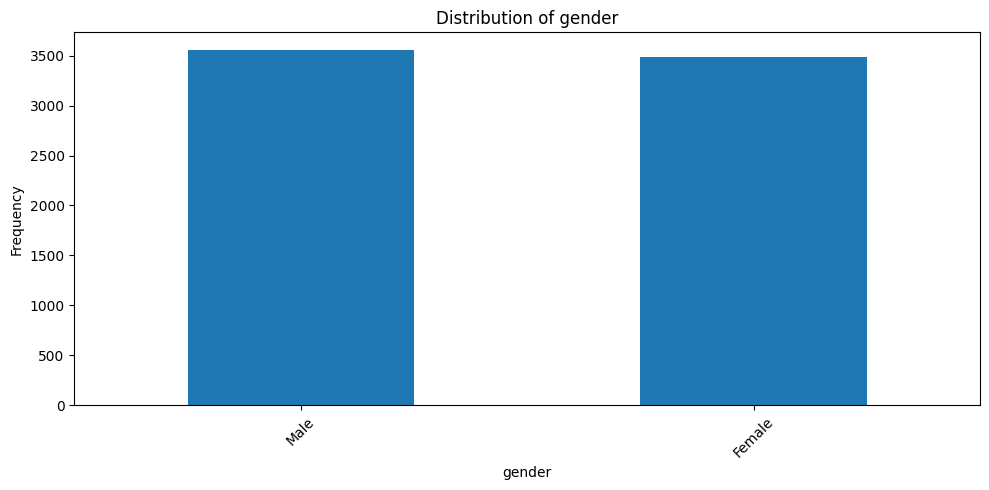

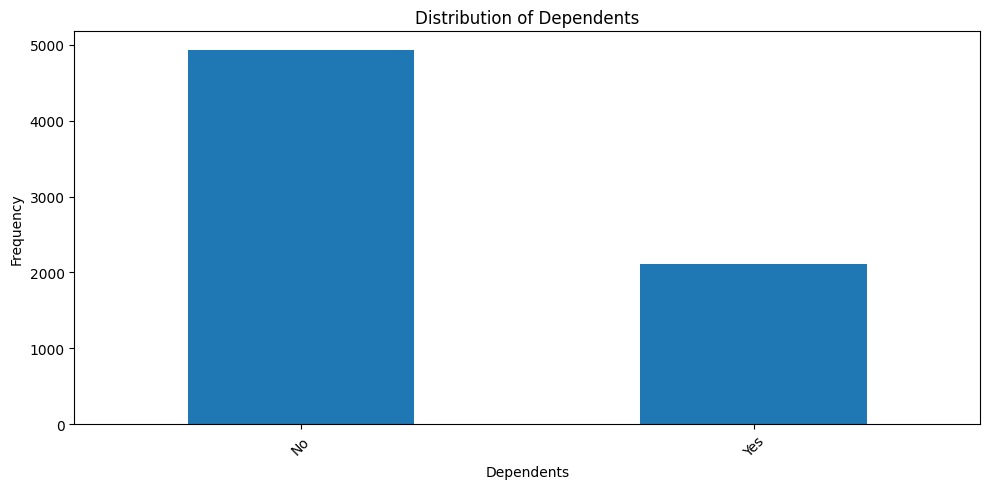

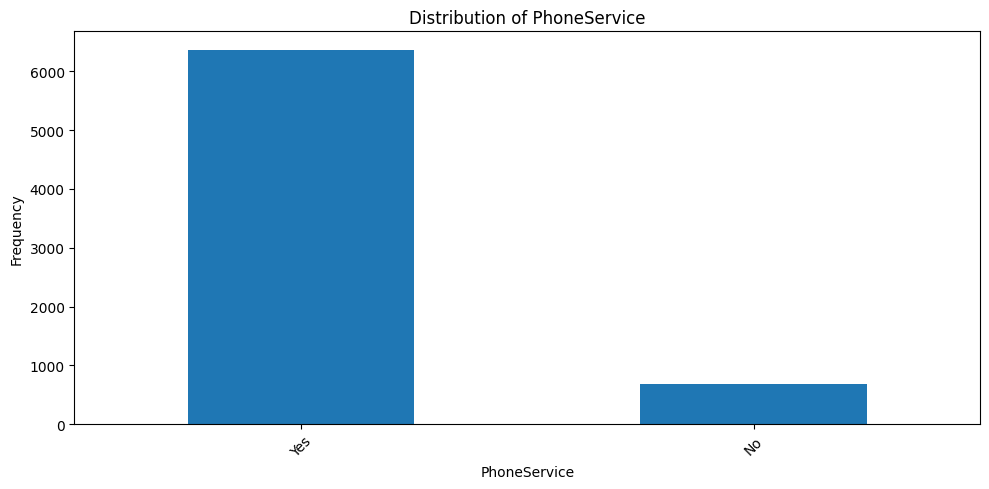

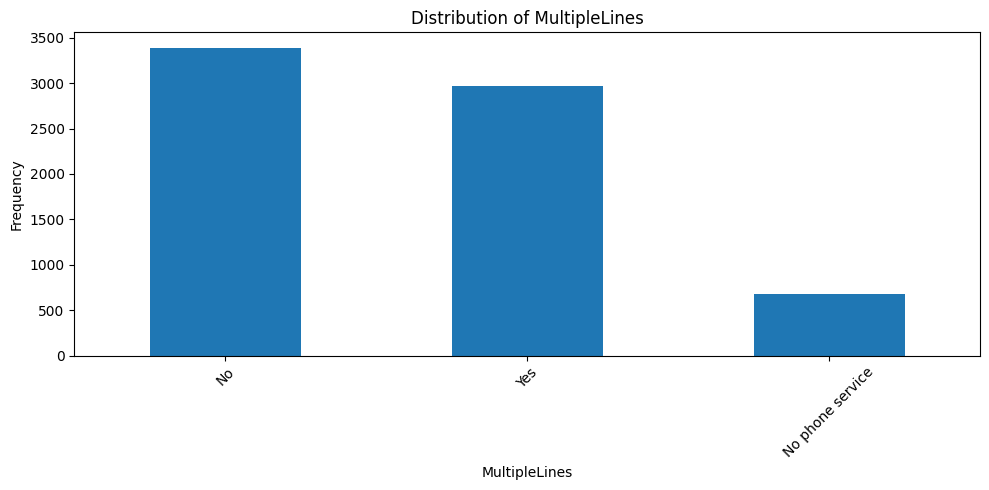

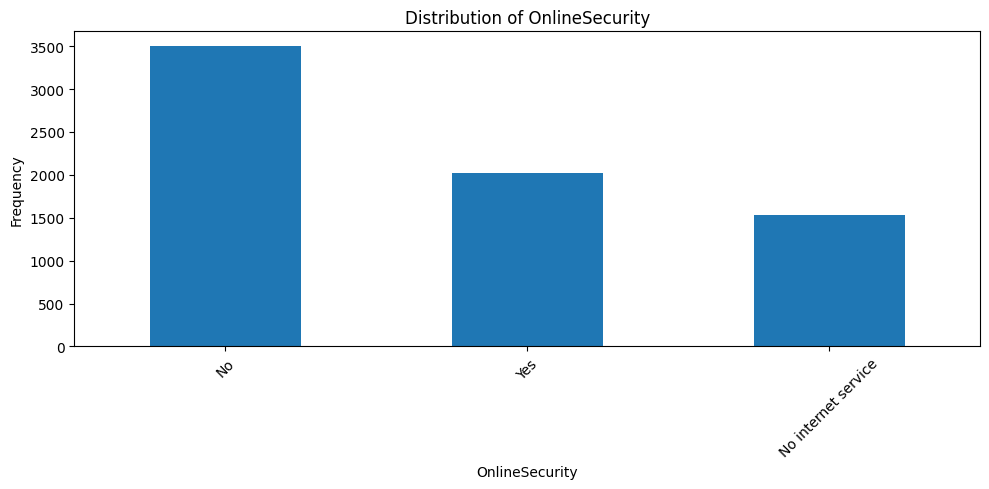

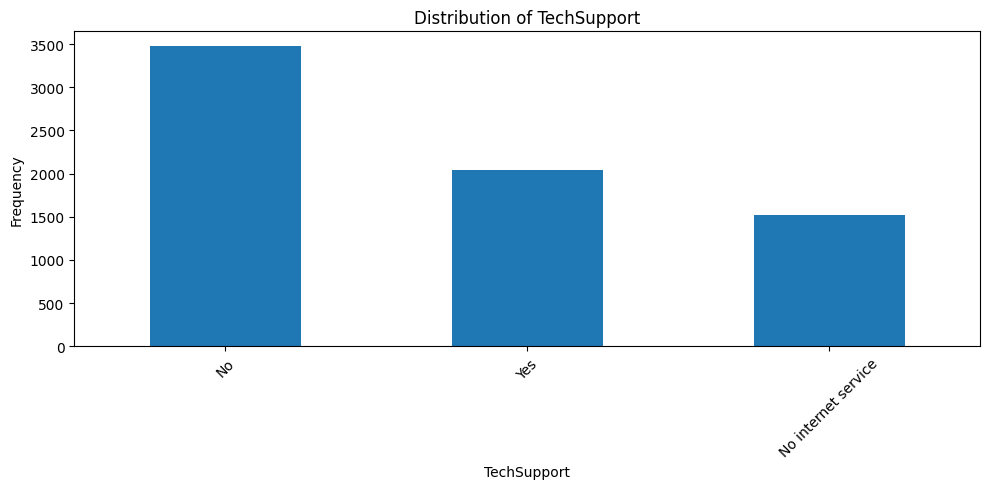

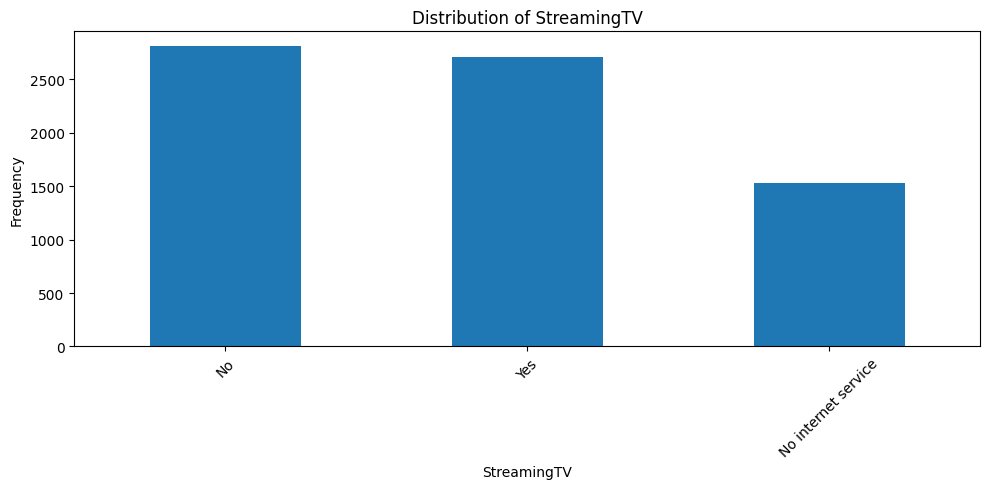

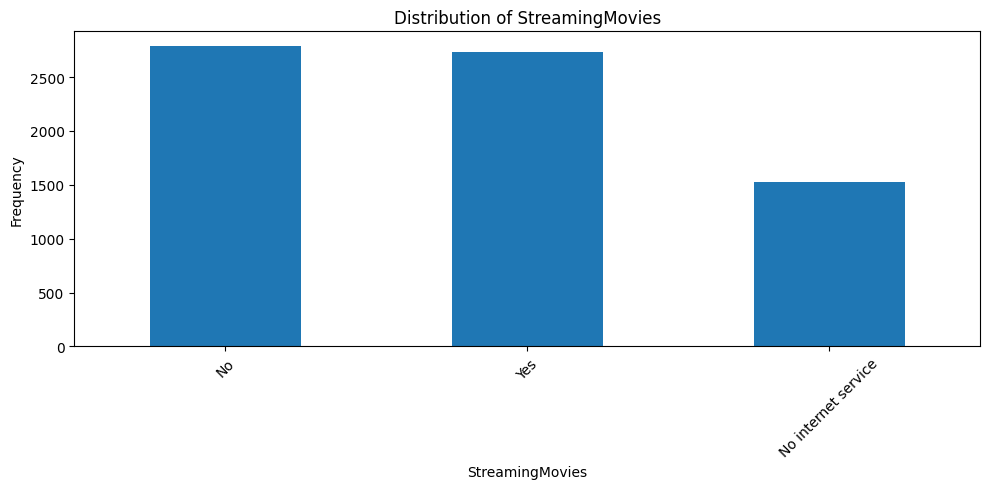

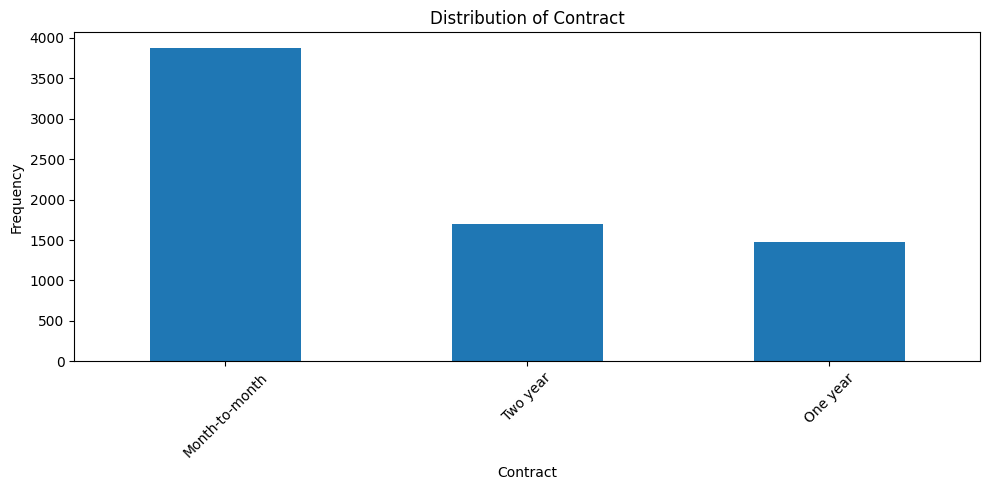

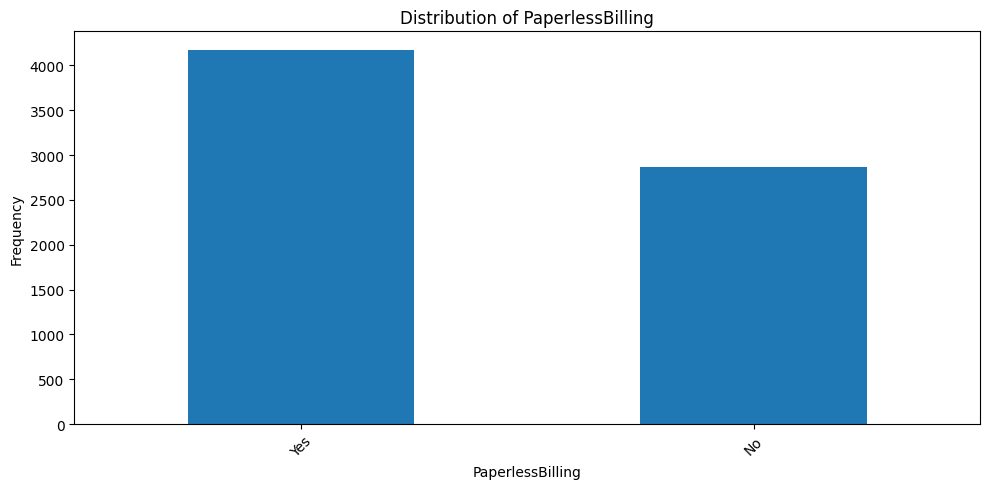

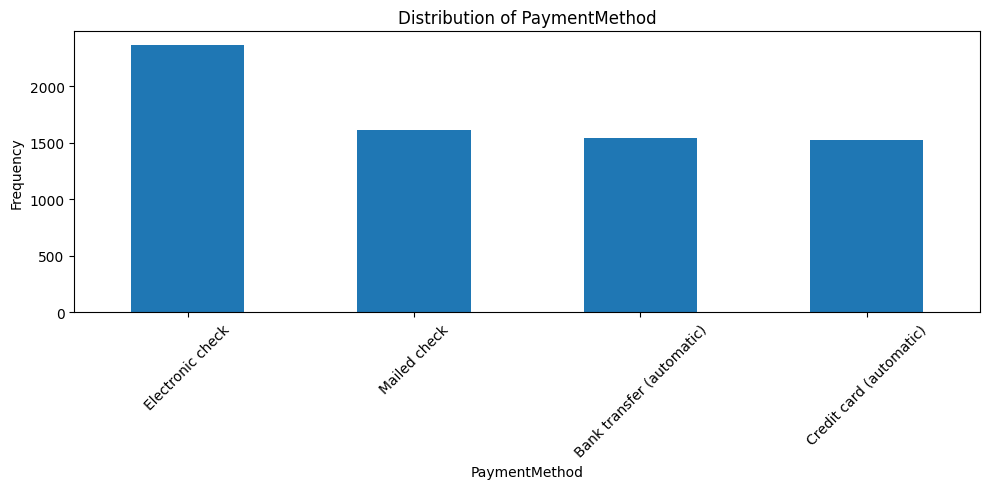

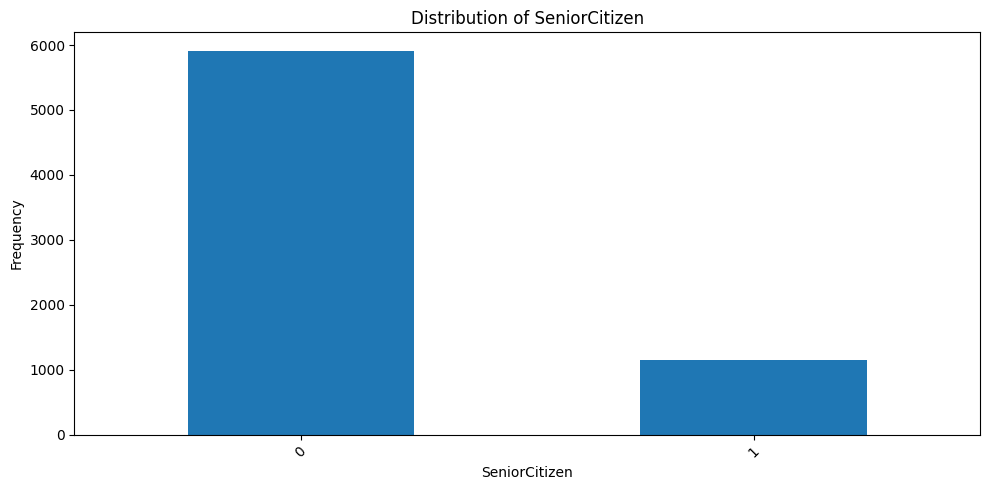

In [ ]:
for features in categorical_features:
  plt.figure(figsize=(10, 5))
  count = churn_df[features].value_counts()
  count.plot(kind = 'bar')
  plt.xlabel(features)
  plt.ylabel("Frequency")
  plt.title(f"Distribution of {features}")
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

In [ ]:
numerical_features = ['tenure', 'MonthlyCharges']

# Target variable distribution (Balance or imbalance classes)

In [ ]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


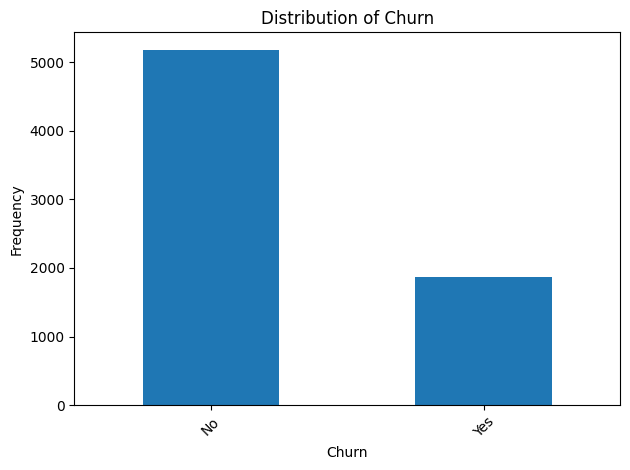

In [ ]:
count = churn_df['Churn'].value_counts()
count.plot(kind = 'bar')
plt.xlabel('Churn')
plt.ylabel("Frequency")
plt.title("Distribution of Churn")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Data Preprocessing: Preparing for Classification

In [ ]:
churn_df = churn_df.drop(columns= 'customerID', axis = 1)

In [ ]:
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


preprocessing = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)


    ]
)

In [ ]:
from sklearn.model_selection import train_test_split


X = churn_df.drop(columns = 'Churn', axis = 1)
y = churn_df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


# Logistic Regression: The Foundation of Classification

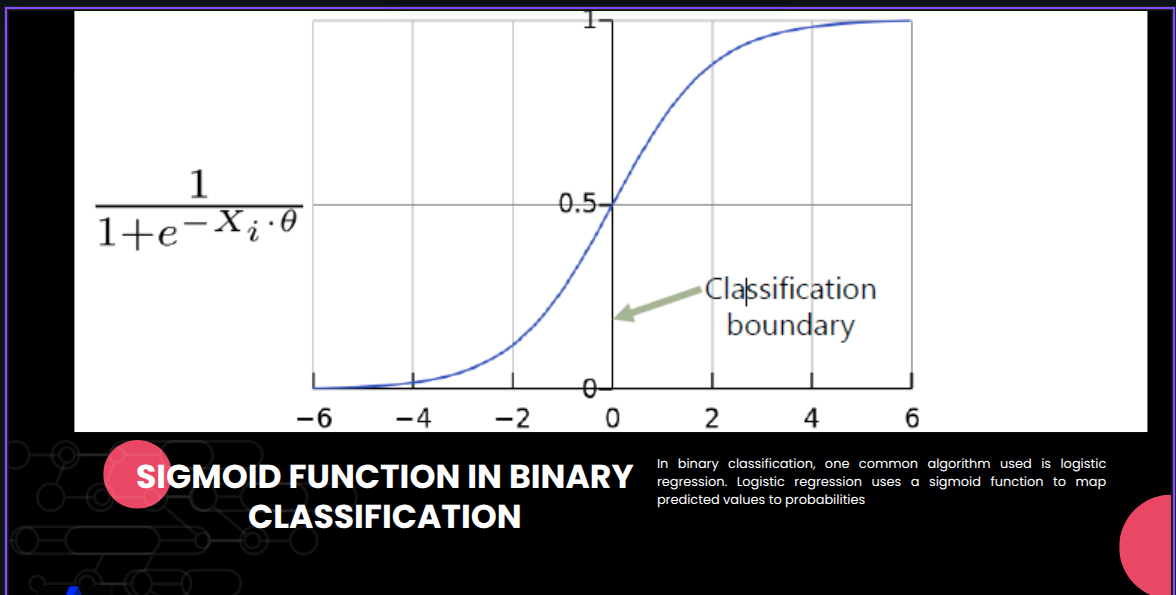

**Mathematical Foundation**

Unlike linear regression, logistic regression uses the sigmoid function to map any real number to a probability between 0 and 1:

Sigmoid Function: `σ(z) = 1 / (1 + e^(-z))`
Where: `z = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ`

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# build pipeline
model_pipeline = Pipeline(
    steps=[
        ('preprocessing', preprocessing),
        ('model', LogisticRegression())
    ]
)

#fit model
model_pipeline.fit(X_train, y_train)


#make prediction
y_pred = model_pipeline.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.86      0.90      0.88      1036
         Yes       0.68      0.58      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



# Support Vector Machines: Handling Complex Patterns

**Mathematical Foundation**

SVM finds the optimal hyperplane that separates classes with maximum margin.

For non-linearly separable data, it uses the kernel trick to map data to higher dimensions.

In [ ]:
from sklearn.svm import SVC
# build pipeline
model_pipeline = Pipeline(
    steps=[
        ('preprocessing', preprocessing),
        ('model', SVC())
    ]
)

#fit model
model_pipeline.fit(X_train, y_train)


#make prediction
y_pred = model_pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.84      0.92      0.88      1036
         Yes       0.70      0.51      0.59       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



# **Interactive Coding exercises**

*Follow the links below to practice all these concepts*


1.   [Hands_on_Practice](https://colab.research.google.com/drive/1a22Z33HLytjQ-Lz0E02ADdAbfV0eRwFu?usp=sharing)




# **Practice Homework**

*Follow the link below for practice questions*

[African institute for Artificiall Intellgence - AI masterclass](https://github.com/aljebraschool/African-Institute-For-Artificial-Intelligence---AI-Masterclass)

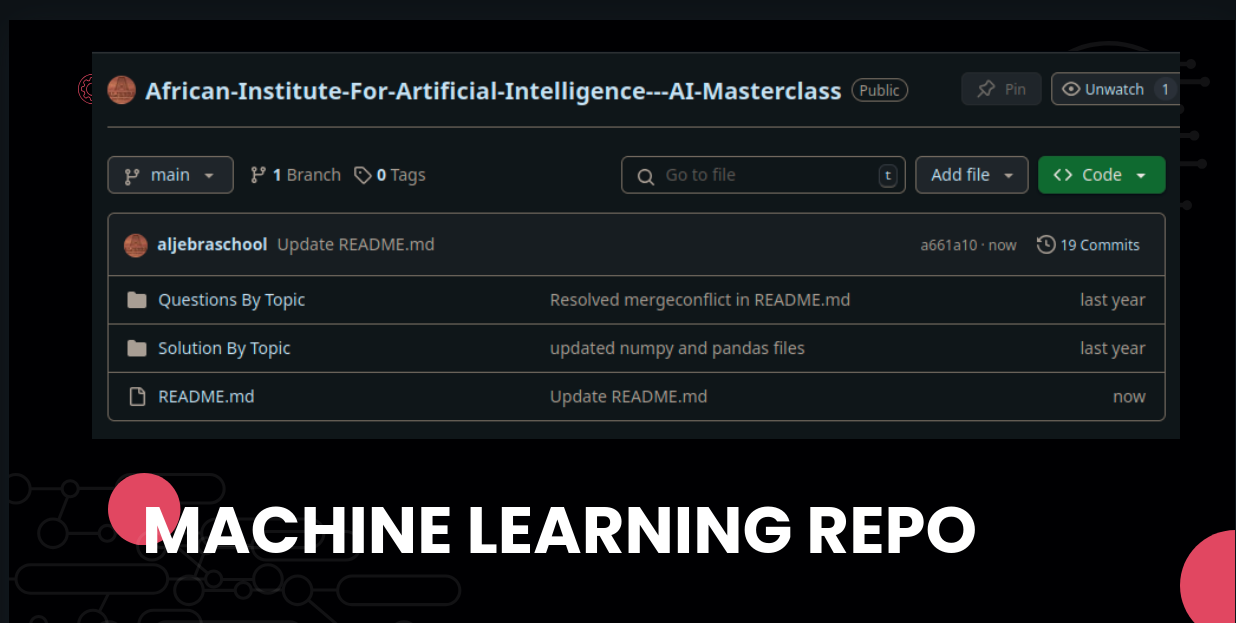

**Other social media links**



*   [Read more on the topic via my blog](https://aljebraschool.hashnode.dev)
*   [Follow me on Linkedin](https://linkedin.com/in/aljebraschool)

